In [2]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
from numpy.linalg import inv
import random

<ipython-input-3-171c13de84b0>:1: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  test_data = np.ndarray(shape=(512,512,4), dtype=np.integer)


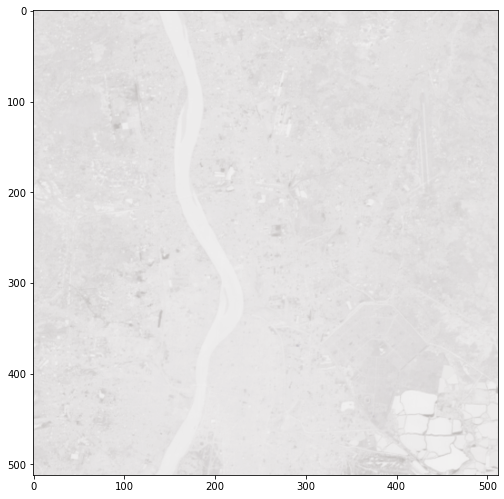

In [3]:

test_data = np.ndarray(shape=(512,512,4), dtype=np.integer)

for i in range(4):
    img = plt.imread('band' + str(i+1) + '.jpg')
    test_data[:,:,i] = np.array(img[:,:,0])
plt.subplot(1,1,1)
plt.imshow(test_data)
plt.subplots_adjust(right = 1.2, top = 2.5)
plt.show()
#print(test_data)

In [4]:
sp_x_r = [159,158,153,154,163,167,171,217,160,213,173,163,185,216,159,162,186,170,
          150,159,186,211,164,218,228,156,179,151,173,145,185,186,181,213,159,208,
          158,191,224,218,178,170,183,171,218,214,218,151,158,225]
sp_y_r = [6,38,16,7,30,129,166,292,32,287,127,159,254,286,156,156,233,461,
          12,45,229,347,47,324,322,16,120,6,457,19,233,232,228,282,18,292,
          20,247,314,344,120,34,233,128,351,287,280,7,9,313]
sp_x_nr = [230,216,489,311,120,137,417,302,89,427,369,88,79,476,70,316,48,394,
           32,448,416,360,287,91,31,293,92,418,68,344,428,55,294,53,380,371,
           486,238,446,131,125,308,312,311,275,359,132,210,457,246,299,360,421,493,
           236,375,392,48,478,254,427,57,445,448,50,404,392,424,451,379,359,269,
           147,412,236,337,232,362,479,475,306,91,462,275,468,102,306,237,338,405,
           264,410,220,106,389,110,247,391,63,433]
sp_y_nr = [83,214,163,85,402,430,307,49,436,425,244,374,227,43,296,70,118,366,
           411,215,113,333,24,235,383,109,402,444,261,420,245,438,149,416,245,66,
           18,55,411,226,271,100,336,208,253,444,387,123,340,108,334,365,375,445,
           158,355,377,233,75,441,103,404,308,313,96,83,49,173,185,406,458,460,
           253,464,98,478,471,327,240,489,239,425,452,65,173,441,478,149,475,90,
           289,198,150,168,147,95,457,93,414,197]


In [5]:
# Mean of River Class
T1 = [0,0,0,0]
a = np.ndarray(shape=(50,4))
for i in range(50):
    for j in range(4):
        T1[j] = T1[j] + test_data[sp_x_r[i],sp_y_r[i],j]
for i in range(4):
    T1[i] = T1[i] / 50
for i in range(50):
    a[i] = np.subtract(test_data[sp_x_r[i],sp_y_r[i],:],T1)
print(T1)
print(a.shape)

[40.94, 26.36, 27.84, 33.62]
(50, 4)


In [14]:
# Mean of Non River Class
T2 = [0,0,0,0]
b = np.ndarray(shape=(100,4), dtype=np.float64)
for i in range(100):
    for j in range(4):
        T2[j] = T2[j] + test_data[sp_x_nr[i],sp_y_nr[i],j]
for i in range(4):
    T2[i] = T2[i] / 100
for i in range(100):
    b[i] = np.subtract(test_data[sp_x_nr[i],sp_y_nr[i],:],T2)
print(T2)
print(b.shape)


[40.62, 25.74, 26.59, 33.21]
(100, 4)


In [7]:
#Covariance for River Class
cov_r = np.ndarray(shape=(4,4), dtype=np.float64)
for i in range(4):
    for j in range(4):
        cov_r[i][j] = np.dot(a[:,i],a[:,j]) / 50
print(cov_r)

[[ 4.3364  4.1016  5.9504 -1.7028]
 [ 4.1016  4.9104  6.8576 -0.6232]
 [ 5.9504  6.8576 15.5344  2.5592]
 [-1.7028 -0.6232  2.5592 34.3556]]


In [8]:
#Covariance for Non-River Class
cov_nr = np.ndarray(shape=(4,4), dtype=np.float64)
for i in range(4):
    for j in range(4):
        cov_nr[i][j] = np.dot(b[:,i],b[:,j]) / 100
print(cov_nr)

[[ 7.4556  6.3912  9.0242  3.4398]
 [ 6.3912  6.4724  8.4534  5.5246]
 [ 9.0242  8.4534 15.7219  5.9161]
 [ 3.4398  5.5246  5.9161 34.9259]]


In [9]:
def calculation(i,j):
    r = np.subtract(test_data[i,j,:],T1)
    nr = np.subtract(test_data[i,j,:],T2)
    
    river = np.dot(np.dot(r.T,inv(cov_r)),r)
    non_river = np.dot(np.dot(nr.T,inv(cov_nr)),nr)
    
    den_cov_r = np.linalg.det(cov_r)
    p1 = (-0.5) * 1 / np.sqrt(den_cov_r) * np.exp(river)
    
    den_cov_nr = np.linalg.det(cov_nr)
    p2 = (-0.5) * 1 / np.sqrt(den_cov_nr) * np.exp(non_river)
    
    return p1, p2

In [10]:
def bayes(P1,P2):
    output = np.ndarray(shape=(512,512), dtype=np.integer)
    for i in range(512):
        for j in range(512):
            p1,p2 = calculation(i,j)
            if((P1*p1) >= (P2*p2)):
                output[i,j] = 255
            else:
                output[i,j] = 0
    return output

<ipython-input-10-4d65717939d1>:2: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  output = np.ndarray(shape=(512,512), dtype=np.integer)


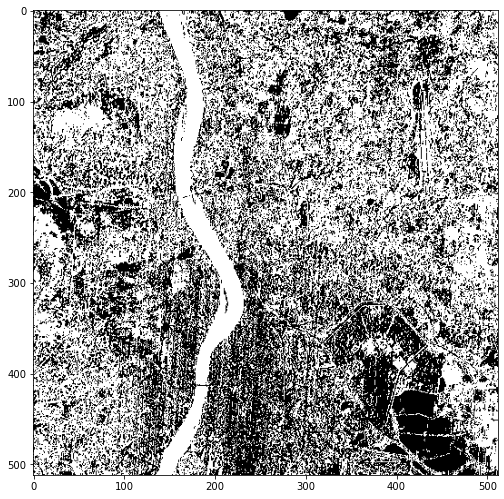

In [11]:
out_image1 = bayes(P1 = 0.3, P2 = 0.7)

plt.subplot(1,1,1)
plt.imshow(out_image1, cmap='gray')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

<ipython-input-10-4d65717939d1>:2: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  output = np.ndarray(shape=(512,512), dtype=np.integer)


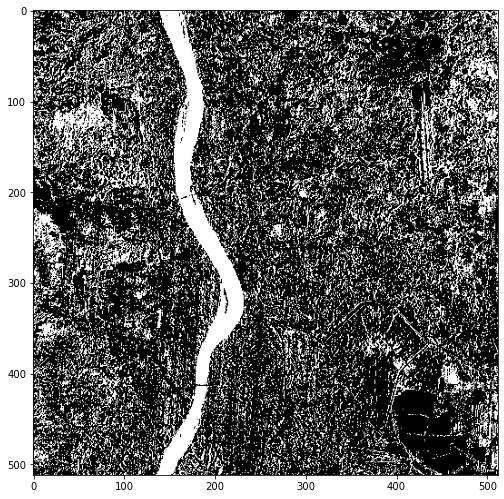

In [12]:
out_image1 = bayes(P1 = 0.5, P2 = 0.5)

plt.subplot(1,1,1)
plt.imshow(out_image1, cmap='gray')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

<ipython-input-10-4d65717939d1>:2: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  output = np.ndarray(shape=(512,512), dtype=np.integer)


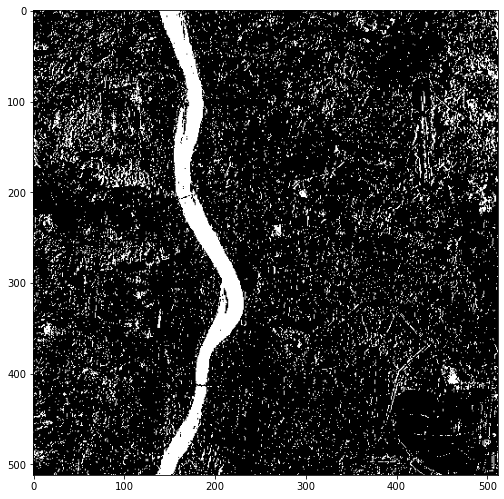

In [13]:
out_image1 = bayes(P1 = 0.7, P2 = 0.3)


plt.subplot(1,1,1)
plt.imshow(out_image1, cmap = 'gray')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()